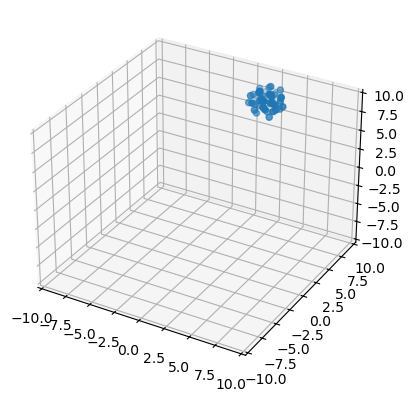

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, FFMpegWriter
import os

# Create the output directory if it doesn't exist
output_dir = "output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

class Boid:
    def __init__(self, position, velocity):
        self.position = np.array(position)
        self.velocity = np.array(velocity)

# パラメータ設定
separation_factor = 0.02  # 分離の強さ
alignment_factor = 0.05   # 整列の強さ
cohesion_factor = 0.02    # 結合の強さ
boundary_factor = 0.2     # 境界回避の強さ
max_speed = 2.0           # 最大速度
boundary = 10             # 境界の位置

def update_boids(
    boids,
    separation_factor=0.02,
    alignment_factor=0.05,
    cohesion_factor=0.02,
    boundary_factor=0.2,
    max_speed=2.0,
    boundary=10,
):
    """
    ボイドの位置と速度を更新する関数

    Parameters:
    boids (list): ボイドのリスト
    separation_factor (float): 分離の強さ。他のボイドと衝突しないようにする力。
    alignment_factor (float): 整列の強さ。近くのボイドと同じ方向に進む力。
    cohesion_factor (float): 結合の強さ。ボイドが集団を形成する力。
    boundary_factor (float): 境界回避の強さ。ボイドが境界に近づいたときに反発する力。
    max_speed (float): 最大速度。ボイドの移動速度の上限。
    boundary (float): 境界の位置。ボイドが動ける範囲の境界。
    """
    positions = np.array([boid.position for boid in boids])
    velocities = np.array([boid.velocity for boid in boids])
    N = len(boids)

    # 分離の計算
    separation = np.zeros_like(positions)
    for i in range(N):
        for j in range(N):
            if i != j:
                distance = np.linalg.norm(positions[i] - positions[j])
                if distance < 1:
                    separation[i] -= (positions[j] - positions[i]) / distance
    
    # 整列の計算
    average_velocity = np.mean(velocities, axis=0)
    alignment = (average_velocity - velocities) * alignment_factor

    # 結合の計算
    center_of_mass = np.mean(positions, axis=0)
    cohesion = (center_of_mass - positions) * cohesion_factor

    # 速度と位置の更新
    for i, boid in enumerate(boids):
        boid.velocity += separation[i] * separation_factor + alignment[i] + cohesion[i]

        # 境界回避
        for dim in range(3):
            if boid.position[dim] < -boundary:
                boid.velocity[dim] += boundary_factor
            elif boid.position[dim] > boundary:
                boid.velocity[dim] -= boundary_factor

        speed = np.linalg.norm(boid.velocity)
        if speed > max_speed:
            boid.velocity = boid.velocity / speed * max_speed
        boid.position += boid.velocity

def init():
    scatter._offsets3d = ([], [], [])
    return scatter,

def animate(i):
    update_boids(boids, separation_factor, alignment_factor, cohesion_factor, boundary_factor, max_speed, boundary)
    positions = np.array([boid.position for boid in boids])
    scatter._offsets3d = (positions[:,0], positions[:,1], positions[:,2])
    return scatter,

# Initialize boids
boids = [Boid(np.random.rand(3) * 20 - 10, np.random.rand(3) * 2 - 1) for _ in range(50)]

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
positions = np.array([boid.position for boid in boids])
scatter = ax.scatter(positions[:,0], positions[:,1], positions[:,2])

ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])

# Create animation
ani = FuncAnimation(fig, animate, init_func=init, frames=500, interval=20, blit=True)

# Save animation as MP4
output_path = os.path.join(output_dir, 'boid_simulation.mp4')
writer = FFMpegWriter(fps=30, metadata=dict(artist='Me'), bitrate=1800)
ani.save(output_path, writer=writer)

# Display the video in Jupyter Notebook
from IPython.display import Video
Video(output_path)
